https://madewithml.com/courses/foundations/linear-regression/

@article{
    
    madewithml,

    author       = {Goku Mohandas},

    title        = { Linear regression - Made With ML },

    howpublished = https://madewithml.com/,

    year         = {2021}
}



prediction = input*weight + bias


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SEED = 1234 # for reproducibility
NUM_SAMPLES = 50

In [3]:
np.random.seed(SEED)

In [4]:
def generate_data(NUM_SAMPLES):
    # generate dummy data for linear regr
    X = np.array(range(NUM_SAMPLES))
    random_noise = np.random.uniform(-10,20, size = NUM_SAMPLES)
    Y = 4*X + random_noise
    return X,Y

In [ ]:
X,Y = generate_data(NUM_SAMPLES=NUM_SAMPLES)

data = np.vstack((X,Y)).T
print(data)

In [6]:
df = pd.DataFrame(data, columns=['X','Y'])
X = df[['X']].values
Y = df[['Y']].values
df.head()

,X,Y
0,0.0,-4.254416
1,1.0,12.663263
2,2.0,11.131832
3,3.0,25.560758
4,4.0,29.399274


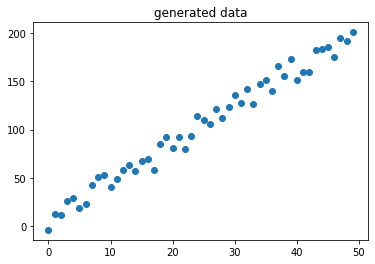

In [7]:
plt.title("generated data")
plt.scatter(x=df['X'],y=df['Y'])
plt.show()

NNNNUUUUUUUUMMMMMMMPPPPPPPPPPPYYYYYYYYYYY

In [8]:
# splitting data

TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [9]:
# shuffling data

indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

In [10]:
# splitting indices

train_start = 0
train_end = int(TRAIN_SIZE*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end


In [11]:
# splitting data from the above indices

X_train = X[train_start:train_end]
Y_train = Y[train_start:train_end]
X_val = X[val_start:val_end]
Y_val = Y[val_start:val_end]
X_test = X[test_start:]
Y_test = Y[test_start:]

print(f"X_train: {X_train.shape} Y_train: {Y_train.shape}")
print(f"X_val: {X_val.shape} Y_val: {Y_val.shape}")
print(f"X_test: {X_test.shape} Y_test: {Y_test.shape}")

X_train: (35, 1) Y_train: (35, 1)
X_val: (7, 1) Y_val: (7, 1)
X_test: (8, 1) Y_test: (8, 1)


STANDARIZING THE DATA

standarized_value = (input-mean)/standard_deviation

In [12]:
def standardize_data(data,mean,std):
    return (data-mean)/std



In [13]:
# takes mean, std of entire data

X_mean = np.mean(X_train)
X_std = np.std(X_train)
Y_mean = np.mean(Y_train)
Y_std = np.std(Y_train)

print(X_mean, Y_mean)

27.0 113.73554348153554


In [14]:
# standardizing all values

X_train = standardize_data(X_train, X_mean, X_std)
Y_train = standardize_data(Y_train, Y_mean, Y_std)
X_val = standardize_data(X_val, X_mean, X_std)
Y_val = standardize_data(Y_val, Y_mean, Y_std)
X_test = standardize_data(X_test, X_mean, X_std)
Y_test = standardize_data(Y_test, Y_mean, Y_std)



WEIIIIGGHTSSSSSSSS

In [15]:
INPUT_DIM = X_train.shape[1] # X is 1 dimensional
OUTPUT_DIM = Y_train.shape[1]

# initialize random weights

W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))
print(f'W: {W.shape}')
print(f'b: {b.shape}')

W: (1, 1)
b: (1, 1)


MODEL

In [ ]:
Y_pred = np.dot(X_train, W) + b
print(f'Y_pred: {Y_pred.shape}')

Y_pred: (35, 1)


COST FUNCTION - MSE (mean squared error)

J = 1/N * SUM[(actual-predicted)^2]

In [ ]:
# check training loop
N = len(Y_train)
loss = (1/N)*np.sum((Y_train - Y_pred)**2)
print(f'loss: {loss:.2f}')

loss: 0.99


GRADIENT DESCENT BABBYYYYYY


In [ ]:
# check training loop
# backpropagation
dW = -(2/N) * np.sum((Y_train - Y_pred) * X_train)
db = -(2/N) * np.sum((Y_train - Y_pred) * 1)

In [17]:
 # should be in the range [1e-8,1e-1]
LEARNING_RATE = 1e-1

In [ ]:
# check training loop
# updating weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

TRAINING

In [16]:
# epochs = no. of times entire data is looped over for training
EPOCHS = 100
N = len(Y_train)

In [18]:
for epoch_num in range(EPOCHS):
    
    # initial prediction
    Y_pred = np.dot(X_train, W) + b

    # loss MSE
    loss = (1/N) * np.sum((Y_train - Y_pred)**2)

    # show progress for every 10 epochs

    if epoch_num%10 == 0:
        print(f'Epoch: {epoch_num} Loss: {loss:.3f}')

    # backpropagation
    dW = -(2/N) * np.sum((Y_train - Y_pred)*X_train)
    db = -(2/N) * np.sum((Y_train - Y_pred)*1)

    # update weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db

Epoch: 0 Loss: 0.986
Epoch: 10 Loss: 0.033
Epoch: 20 Loss: 0.022
Epoch: 30 Loss: 0.022
Epoch: 40 Loss: 0.022
Epoch: 50 Loss: 0.022
Epoch: 60 Loss: 0.022
Epoch: 70 Loss: 0.022
Epoch: 80 Loss: 0.022
Epoch: 90 Loss: 0.022


EVALUATION

use the new W and b to predict

In [ ]:
# predictions
pred_train = W*X_train + b
pred_test = W*X_test + b

In [21]:
# train and test MSE
train_mse = np.mean((Y_train - pred_train)**2)
test_mse = np.mean((Y_test - pred_test)**2)

print(f'train_mse: {train_mse:.2f}')
print(f'test_mse: {test_mse:.2f}')

train_mse: 0.02
test_mse: 0.01


PLOTTING THE BEST FIT LINE

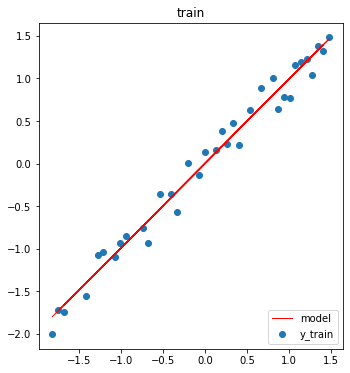

In [34]:
# plotting training data

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plt.scatter(X_train, Y_train, label = 'y_train')
plt.plot(
    X_train, 
    pred_train, 
    color = 'red', 
    linewidth=1, 
    linestyle='-', 
    label='model'
    )
plt.legend(loc='lower right')

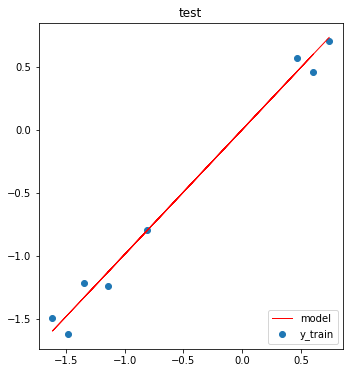

In [35]:
# plotting testing data

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('test')
plt.scatter(X_test, Y_test, label = 'y_train')
plt.plot(
    X_test, 
    pred_test, 
    color = 'red', 
    linewidth=1, 
    linestyle='-', 
    label='model'
    )
plt.legend(loc='lower right')

INTERPRETABILITY

original equation: 
y = 4X + b

original weight = 4

since data was standarized, we've to unstanderized the weight and intercept b to check how the predicted equation compares to original equation

formula:

W_unscaled = sum{j=1->k: Wj(Y_std / X_std)}

b_unscaled = b_scaled*Y_std + Y_mean - sum{j=1->k: W_unscaled * X_mean}

In [33]:
# Unscaled weights
W_unscaled = W * (Y_std/X_std)
b_unscaled = b * Y_std + Y_mean - np.sum(W_unscaled*X_mean)


print(f'[actual] y = 4X + noise')
print(f'[model] y_hat = {W_unscaled[0][0]:.1f} + {b_unscaled[0][0]:.1f}')

[actual] y = 4X + noise
[model] y_hat = 3.9 + 7.8
